In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [39]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving XRP_1H.csv to XRP_1H (1).csv


In [40]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['XRP_1H.csv'])) 
df.head()


,symbol,interval,openTime,open,high,low,close,volume,closeTime,quoteAssetVolume,trades,baseAssetVolume
0,XRPUSDT,1h,1586383200000,0.20043,0.20192,0.20005,0.20173,4165678.1,1586386799999,397091.624385,2749,1975054.1
1,XRPUSDT,1h,1586386800000,0.20178,0.20247,0.20124,0.20192,4623498.4,1586390399999,433988.331345,2782,2149511.1
2,XRPUSDT,1h,1586390400000,0.20192,0.20231,0.20042,0.20174,5330854.3,1586393999999,381760.914615,3317,1894456.4
3,XRPUSDT,1h,1586394000000,0.20173,0.20173,0.19858,0.19990,5491668.5,1586397599999,517127.649423,3385,2587160.9
4,XRPUSDT,1h,1586397600000,0.19988,0.19994,0.19919,0.19982,2616074.1,1586401199999,254862.977411,1780,1277159.1


In [41]:
df.describe()


,openTime,open,high,low,close,volume,closeTime,quoteAssetVolume,trades,baseAssetVolume
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9.000000e+03,9.000000e+03,9000.000000,9.000000e+03
mean,1.602604e+12,0.350051,0.354121,0.345775,0.350184,2.691892e+07,1.602607e+12,6.731841e+06,16629.468667,1.336181e+07
std,9.365647e+09,0.242866,0.248525,0.237022,0.243117,5.017867e+07,9.365647e+09,1.620914e+07,30659.988578,2.502465e+07
min,1.586383e+12,0.171780,0.174350,0.169000,0.171830,0.000000e+00,1.586387e+12,0.000000e+00,0.000000,0.000000e+00
25%,1.594500e+12,0.206300,0.207665,0.204925,0.206317,4.544890e+06,1.594504e+12,4.804345e+05,2477.750000,2.184597e+06
50%,1.602599e+12,0.256170,0.257150,0.254750,0.256185,1.098177e+07,1.602603e+12,1.420568e+06,5931.000000,5.315440e+06
75%,1.610716e+12,0.446593,0.451965,0.441563,0.446535,3.004953e+07,1.610720e+12,6.279637e+06,17304.000000,1.482828e+07
max,1.618823e+12,1.937770,1.966890,1.890000,1.937770,1.404208e+09,1.618826e+12,3.125417e+08,586341.000000,7.047529e+08


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            9000 non-null   object 
 1   interval          9000 non-null   object 
 2   openTime          9000 non-null   int64  
 3   open              9000 non-null   float64
 4   high              9000 non-null   float64
 5   low               9000 non-null   float64
 6   close             9000 non-null   float64
 7   volume            9000 non-null   float64
 8   closeTime         9000 non-null   int64  
 9   quoteAssetVolume  9000 non-null   float64
 10  trades            9000 non-null   int64  
 11  baseAssetVolume   9000 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 843.9+ KB


In [43]:
df.isnull().sum()


symbol              0
interval            0
openTime            0
open                0
high                0
low                 0
close               0
volume              0
closeTime           0
quoteAssetVolume    0
trades              0
baseAssetVolume     0
dtype: int64

In [44]:
df.openTime  = df.openTime.astype(str)

In [45]:
df.openTime =  df.openTime.str.slice(stop=10)


In [46]:
df.openTime = pd.to_datetime(df.openTime,unit='s')


In [47]:
m=20


In [48]:

df['ind'] = df.index
df['mean'] = (df.open+df.high+df.low+df.close)/4
columns=['open','close','high','low','volume','openTime']
df.drop(columns,axis=1,inplace=True)

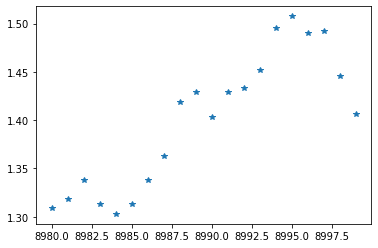

In [54]:

x=df['ind'].tail(m).values
y=df['mean'].tail(m).values

plt.plot(x,y,'*')

In [55]:
model = LinearRegression()
x=x.reshape(-1,1)
y=y.reshape(-1,1)
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print('weight: ',model.coef_)
print('y_axis: ',model.intercept_)

weight:  [[0.01027673]]
y_axis:  [-90.9827083]


In [57]:
min_pt = x.min() * model.coef_[0] + model.intercept_
max_pt = x.max() * model.coef_[0] + model.intercept_

b1=model.coef_
b0=model.intercept_

max_n =  0
abs_vale=0
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    abs_value= abs(y[i] - y_pred)
    if(abs_value>max_n):
      max_n = abs_value


min1=min_pt+max_n
max1=max_pt+max_n
min2=min_pt-max_n
max2=max_pt-max_n

min1=min1.reshape(-1,)
max1=max1.reshape(-1,)
min2=min2.reshape(-1,)
max2=max2.reshape(-1,)

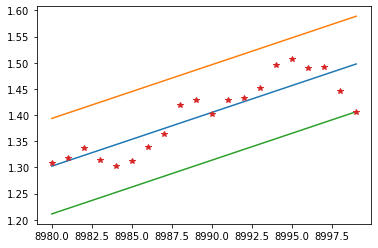

In [59]:
plt.plot([x.min(),x.max()],[min_pt,max_pt])
plt.plot([x.min(),x.max()],[min1,max1])
plt.plot([x.min(),x.max()],[min2,max2])
plt.plot(x,y,'*')